In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

rings = "tot_rings.dat"
clusters = "plottami.dat"
pathW = "D:/TESI_DATI/Cluster_Analisi/"
pathUNIX = "/home/riccardo/Mixtures/Jobs/"
dic1 = [x for x in os.listdir(f"{pathW}/1BO")]

dic2_1bo = {}
for value in dic1:
    with open(f"{pathW}/1BO/{value}/{clusters}", "r") as rg:
            items = rg.read().splitlines()
            items = list(map(int,items))
    dic2_1bo[value] = items

    
dic2_2bo = {}
for value in dic1:
    with open(f"{pathW}/2BO/{value}/{clusters}", "r") as rg:
            items = rg.read().splitlines()
            items = list(map(int,items))
    dic2_2bo[value] = items
    
count_1bo = {x:[] for x in range(1,401)}
count_2bo = {x:[] for x in range(1,401)}                
        
for mix in sorted (dic2_1bo.keys()): 
        for n,r in count_1bo.items():
            n_mol = 400-400*float(mix)
            counter = dic2_1bo[mix].count(n)/n_mol*n/10
            count_1bo[n].append(counter)

for mix in sorted (dic2_2bo.keys()): 
        for n,r in count_2bo.items():
            n_mol = 400-400*float(mix)
            counter = dic2_2bo[mix].count(n)/n_mol*n/10
            count_2bo[n].append(counter)
            
xax = np.array([0.00,0.125,0.25,0.375,0.50,0.625,0.75,0.88,0.94])

dic2_r_1bo = {}
for value in dic1:
    with open(f"{pathW}/1BO/{value}/{rings}", "r") as rg:
            items = rg.read().splitlines()
            items = list(map(int,items))
    dic2_r_1bo[value] = items

    
dic2_r_2bo = {}
for value in dic1:
    with open(f"{pathW}/2BO/{value}/{rings}", "r") as rg:
            items = rg.read().splitlines()
            items = list(map(int,items))
    dic2_r_2bo[value] = items
    
count_r_1bo = {x:[] for x in range(1,401)}
count_r_2bo = {x:[] for x in range(1,401)}

for mix in sorted (dic2_r_1bo.keys()): 
        for n,r in count_r_1bo.items():
            n_mol = 400-400*float(mix)
            counter = dic2_r_1bo[mix].count(n)/n_mol*n/10
            #print(f"We have {counter}% molecules in {n} m-rings on the mixture {mix}DBE")
            count_r_1bo[n].append(counter)

for mix in sorted (dic2_r_2bo.keys()): 
        for n,r in count_r_2bo.items():
            n_mol = 400-400*float(mix)
            counter = dic2_r_2bo[mix].count(n)/n_mol*n/10
            #print(f"We have {counter}% molecules in {n} m-rings on the mixture {mix}DBE")
            count_r_2bo[n].append(counter)

#COUNTING BIG CLUSTERS >6M            
big_clust_1bo = np.zeros(9)
for x in range(7,401):
    big_clust_1bo = big_clust_1bo + np.array(list(count_1bo[x]))

big_clust_2bo = np.zeros(9)
for x in range(7,401):
    big_clust_2bo = big_clust_2bo + np.array(list(count_2bo[x]))
    
#COUNTING BIG RINGS >6M
big_ring_1bo = np.zeros(9)
for x in range(7,401):
    big_ring_1bo = big_ring_1bo + np.array(list(count_r_1bo[x]))

big_ring_2bo = np.zeros(9)
for x in range(7,401):
    big_ring_2bo = big_ring_2bo + np.array(list(count_r_2bo[x]))

NameError: name 'setlabel' is not defined

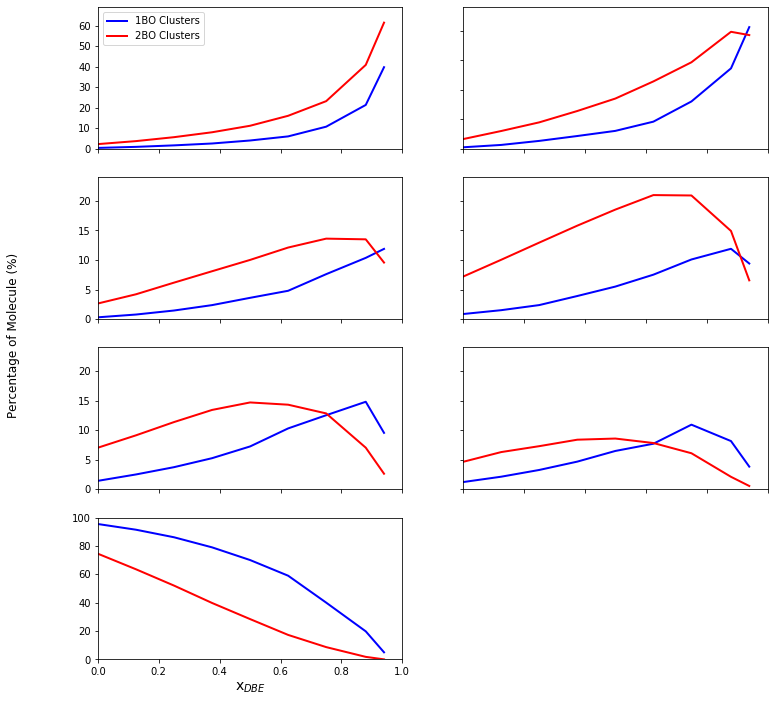

In [2]:
plt.rcParams['lines.linewidth'] = 2

fig = plt.figure(figsize=(12,12))

# set height ratios for sublots
gs = gridspec.GridSpec(4, 2, height_ratios=[2,2,2,2]) 

fig.text(0.02, 0.5, 'Percentage of Molecule (%)', va='center', rotation='vertical',fontsize=12)

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax0.plot(xax,count_1bo[1], "b", label = "1BO Clusters")
ax0.plot(xax,count_2bo[1], "r", label = "2BO Clusters")
ax0.legend()
ax0.set_ylim(0,69)
ax0.label_outer()

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(xax,count_1bo[2], "b")
ax1.plot(xax,count_2bo[2], "r")
ax1.label_outer()
ax1.set_ylim(0,24)

ax2 = plt.subplot(gs[2], sharex = ax0)
ax2.plot(xax,count_1bo[3], "b")
ax2.plot(xax,count_2bo[3], "r")
ax2.label_outer()
ax2.set_ylim(0,24)

ax3 = plt.subplot(gs[3], sharex = ax0)
ax3.plot(xax,count_1bo[4], "b")
ax3.plot(xax,count_2bo[4], "r")
ax3.label_outer()
ax3.set_ylim(0,24)


ax4 = plt.subplot(gs[4], sharex = ax0)
ax4.plot(xax,count_1bo[5], "b")
ax4.plot(xax,count_2bo[5], "r")
ax4.label_outer()
ax4.set_ylim(0,24)

ax5 = plt.subplot(gs[5], sharex = ax0)
ax5.plot(xax,count_1bo[6], "b")
ax5.plot(xax,count_2bo[6], "r")
ax5.set_ylim(0,24)
ax5.label_outer()

ax6 = plt.subplot(gs[6], sharex = ax0)
ax6.plot(xax,big_clust_1bo, "b",linewidth=2)
ax6.plot(xax,big_clust_2bo, "r",linewidth=2)

ax6.set_ylim(0,100)
ax6.set(xlabel='x$_{DBE}$')
ax6.xaxis.get_label().set_fontsize(14)
ax0.set_xlim(0,1)

#Labels for the subplots
setlabel(ax0, 'n = 1',fontsize = 11)
setlabel(ax1, 'n = 2',fontsize = 11)
setlabel(ax2, 'n = 3',fontsize = 11)
setlabel(ax3, 'n = 4',fontsize = 11)
setlabel(ax4, 'n = 5',fontsize = 11)
setlabel(ax5, 'n = 6',fontsize = 11)
setlabel(ax6, 'n > 6',fontsize = 11)

#hiding 0 in the y-ax
ax0.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax1.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax2.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax3.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax4.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax5.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax6.yaxis.get_major_ticks()[0].label1.set_visible(False)

#plt.savefig('/home/riccardo/Dropbox/Mixtures_2019/Paper-Riccardo/Figures/just_cluster.svg', format='svg', dpi=1200)

In [4]:
import numpy
def setlabel(ax, label, loc=1, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],loc=loc,handlelength=0,handleheight=0,handletextpad=0,borderaxespad=0,borderpad=borderpad,frameon=False,**kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()

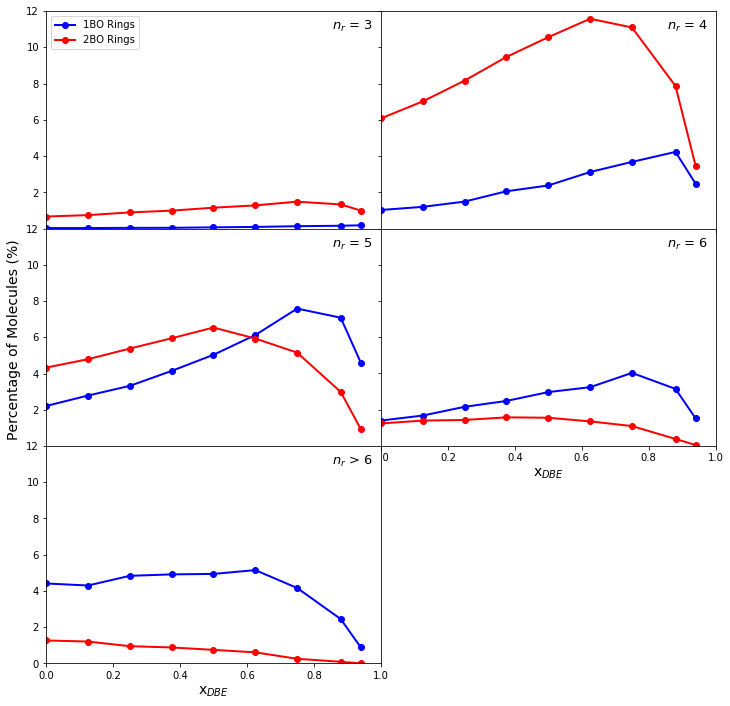

In [7]:
plt.rcParams['lines.linewidth'] = 2

fig = plt.figure(figsize=(12,12))

# set height ratios for sublots
gs = gridspec.GridSpec(3, 2, hspace = 0, wspace = 0,height_ratios=[2,2,2]) 

fig.text(0.08, 0.5, 'Percentage of Molecules (%)', va='center', rotation='vertical',fontsize=14)

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax0.plot(xax,count_r_1bo[3], "b-o", label = "1BO Rings")
ax0.plot(xax,count_r_2bo[3], "r-o", label = "2BO Rings")
ax0.legend(loc = 'upper left')
ax0.set_ylim(0.01,12)
ax0.set_xticklabels([])
ax0.label_outer()

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(xax,count_r_1bo[4], "b-o")
ax1.plot(xax,count_r_2bo[4], "r-o")
ax1.label_outer()
ax1.set_ylim(0.01,12)

ax2 = plt.subplot(gs[2], sharex = ax0)
ax2.plot(xax,count_r_1bo[5], "b-o")
ax2.plot(xax,count_r_2bo[5], "r-o")
ax2.label_outer()
ax2.set_ylim(0.01,12)

ax3 = plt.subplot(gs[3], sharex = ax0)
ax3.plot(xax,count_r_1bo[6], "b-o")
ax3.plot(xax,count_r_2bo[6], "r-o")
ax3.set_ylim(0,12)
ax3.set(xlabel='x$_{DBE}$')
ax3.xaxis.get_label().set_fontsize(14)
ax3.set_yticklabels([])


ax4 = plt.subplot(gs[4], sharex = ax0)
ax4.plot(xax,big_ring_1bo, "b-o")
ax4.plot(xax,big_ring_2bo, "r-o")
ax4.set_ylim(0,12)
ax4.set_xticklabels([0.00,0.20,0.40,0.60,0.80,1.00])
ax4.set(xlabel='x$_{DBE}$')
ax4.xaxis.get_label().set_fontsize(14)
ax4.set_xlim(0,1)

#Labels for the subplots
setlabel(ax0, '$n_r$ = 3',fontsize = 13)
setlabel(ax1, '$n_r$ = 4',fontsize = 13)
setlabel(ax2, '$n_r$ = 5',fontsize = 13)
setlabel(ax3, '$n_r$ = 6',fontsize = 13)
setlabel(ax4, '$n_r$ > 6',fontsize = 13)

#hiding 0 in the y-ax


plt.savefig('C:/Users/r.farris10/Dropbox/Mixtures_2019/PresentazioneFinaleChePunisceIDisonesti/fig/plot/rings.png', format='png', dpi=1200)

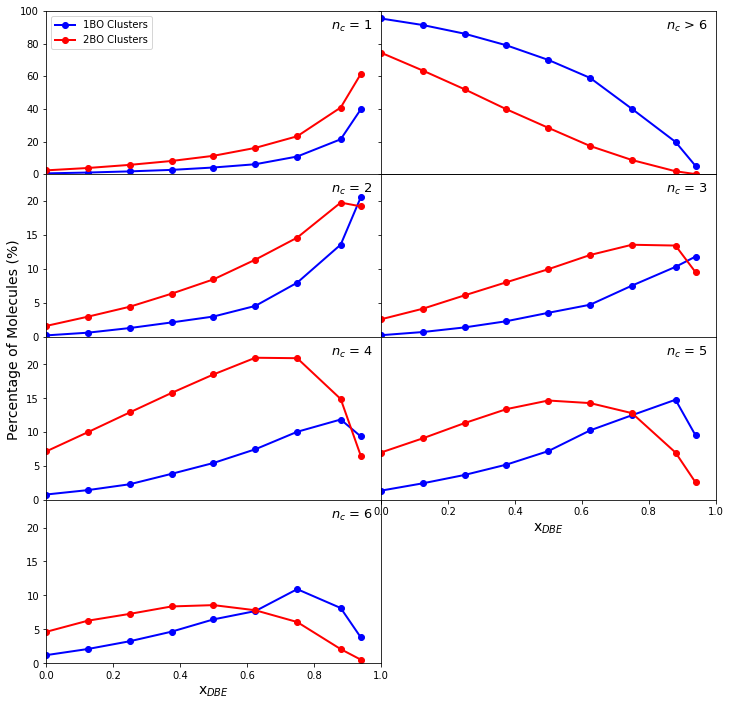

In [8]:
plt.rcParams['lines.linewidth'] = 2

fig = plt.figure(figsize=(12,12))

# set height ratios for sublots
gs = gridspec.GridSpec(4, 2, hspace = 0, wspace = 0, height_ratios=[2,2,2,2]) 

fig.text(0.08, 0.5, 'Percentage of Molecules (%)', va='center', rotation='vertical',fontsize=14)

# the fisrt subplot
ax0 = plt.subplot(gs[0], sharex = ax5)
ax0.plot(xax,count_1bo[1], "b-o", label = "1BO Clusters")
ax0.plot(xax,count_2bo[1], "r-o", label = "2BO Clusters")
ax0.legend(loc='upper left')
ax0.set_ylim(0,100)
ax0.label_outer()

ax1 = plt.subplot(gs[2], sharex = ax5)
ax1.plot(xax,count_1bo[2], "b-o")
ax1.plot(xax,count_2bo[2], "r-o")
ax1.set_ylim(0,24)
ax1.label_outer()

ax2 = plt.subplot(gs[3], sharex = ax4)
ax2.plot(xax,count_1bo[3], "b-o")
ax2.plot(xax,count_2bo[3], "r-o")
ax2.label_outer()
ax2.set_ylim(0,24)

ax3 = plt.subplot(gs[4], sharex = ax5)
ax3.plot(xax,count_1bo[4], "b-o")
ax3.plot(xax,count_2bo[4], "r-o")
ax3.label_outer()
ax3.set_ylim(0,24)
#N > 6
ax4 = plt.subplot(gs[1], sharex = ax4)
ax4.plot(xax,big_clust_1bo, "b-o")
ax4.plot(xax,big_clust_2bo, "r-o")
ax4.set_ylim(0,100)
ax4.set_xticks([])
ax4.label_outer()
#N = 6
ax5 = plt.subplot(gs[6])
ax5.plot(xax,count_1bo[6], "b-o")
ax5.plot(xax,count_2bo[6], "r-o")
ax5.set_ylim(0,24)
ax5.xaxis.get_label().set_fontsize(14)
ax5.set(xlabel='x$_{DBE}$')
#N = 5
ax6 = plt.subplot(gs[5])
ax6.plot(xax,count_1bo[5], "b-o")
ax6.plot(xax,count_2bo[5], "r-o")
ax6.set_yticks([])
ax6.set_ylim(0,24)
ax6.set(xlabel='x$_{DBE}$')
ax6.xaxis.get_label().set_fontsize(14)



ax5.set_xlim(0,1)
ax6.set_xlim(0,1)
#Labels for the subplots
setlabel(ax0, '$n_c$ = 1',fontsize = 13)
setlabel(ax1, '$n_c$ = 2',fontsize = 13)
setlabel(ax2, '$n_c$ = 3',fontsize = 13)
setlabel(ax3, '$n_c$ = 4',fontsize = 13)
setlabel(ax6, '$n_c$ = 5',fontsize = 13)
setlabel(ax5, '$n_c$ = 6',fontsize = 13)
setlabel(ax4, '$n_c$ > 6',fontsize = 13)

#hiding 0 in the y-ax



plt.savefig('C:/Users/r.farris10/Dropbox/Mixtures_2019/PresentazioneFinaleChePunisceIDisonesti/fig/plot/cluster.png', format='png', dpi=1200)